In [ ]:
!wget https://www.dropbox.com/s/yym27er0dpn6ggo/nse_stocks_data.zip

--2020-06-01 17:03:54--  https://www.dropbox.com/s/yym27er0dpn6ggo/nse_stocks_data.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.1, 2620:100:6030:1::a27d:5001
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/yym27er0dpn6ggo/nse_stocks_data.zip [following]
--2020-06-01 17:03:55--  https://www.dropbox.com/s/raw/yym27er0dpn6ggo/nse_stocks_data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb01cb42ec3707fe76b04fbeaac.dl.dropboxusercontent.com/cd/0/inline/A43kUnx1xf_0Y3LtR3_ZVlov7D6eu4XgHA1jqcP7sgmw63T3NgGreHuJua75YqY0Own1fqQrK8cxoLBv4hwqEBGI0xckE7abGelOx5Eo6-syrNJN-Z0BE0I7rLZDq0ojV3c/file# [following]
--2020-06-01 17:03:55--  https://ucb01cb42ec3707fe76b04fbeaac.dl.dropboxusercontent.com/cd/0/inline/A43kUnx1xf_0Y3LtR3_ZVlov7D6eu4XgHA1jqcP7sgmw63T3NgGreHuJua75YqY0Own1fqQrK8cxoLBv4hwqEBGI0x

In [ ]:
!sudo apt-get install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


In [ ]:
!unzip nse_stocks_data.zip

Archive:  nse_stocks_data.zip
replace FINAL_FROM_DF.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: FINAL_FROM_DF.csv       


In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
df = pd.read_csv("/content/FINAL_FROM_DF.csv")

In [ ]:
print(df.head())

       SYMBOL SERIES      OPEN  ...   TIMESTAMP  TOTALTRADES          ISIN
0   20MICRONS     EQ     37.80  ...  2017-06-28          202  INE144J01027
1  3IINFOTECH     EQ      4.10  ...  2017-06-28         7353  INE748C01020
2     3MINDIA     EQ  13425.15  ...  2017-06-28          748  INE470A01017
3     63MOONS     EQ     61.00  ...  2017-06-28          437  INE111B01023
4     8KMILES     EQ    546.10  ...  2017-06-28         1866  INE650K01021

[5 rows x 13 columns]


In [ ]:
#data type of each column
print(df.dtypes)

SYMBOL          object
SERIES          object
OPEN           float64
HIGH           float64
LOW            float64
CLOSE          float64
LAST           float64
PREVCLOSE      float64
TOTTRDQTY        int64
TOTTRDVAL      float64
TIMESTAMP       object
TOTALTRADES      int64
ISIN            object
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846404 entries, 0 to 846403
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SYMBOL       846404 non-null  object 
 1   SERIES       843947 non-null  object 
 2   OPEN         846404 non-null  float64
 3   HIGH         846404 non-null  float64
 4   LOW          846404 non-null  float64
 5   CLOSE        846404 non-null  float64
 6   LAST         846404 non-null  float64
 7   PREVCLOSE    846404 non-null  float64
 8   TOTTRDQTY    846404 non-null  int64  
 9   TOTTRDVAL    846404 non-null  float64
 10  TIMESTAMP    846404 non-null  object 
 11  TOTALTRADES  846404 non-null  int64  
 12  ISIN         846404 non-null  object 
dtypes: float64(7), int64(2), object(4)
memory usage: 83.9+ MB


SYMBOL, SERIES, ISIN are values used for identifying the stock. We will remove it from the dataframe.
TIMESTAMP will be changed to four columns as YYYY MM DD because date is an important component here.



In [ ]:
df = df.drop('SYMBOL', 1)
df = df.drop('SERIES', 1)
df = df.drop('ISIN', 1)
#1 is for columns, 0 is for rows

print(df.dtypes)

OPEN           float64
HIGH           float64
LOW            float64
CLOSE          float64
LAST           float64
PREVCLOSE      float64
TOTTRDQTY        int64
TOTTRDVAL      float64
TIMESTAMP       object
TOTALTRADES      int64
dtype: object


In [ ]:
df['YEAR']=1
df['MONTH']=1
df['DATE']=1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846404 entries, 0 to 846403
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   OPEN         846404 non-null  float64
 1   HIGH         846404 non-null  float64
 2   LOW          846404 non-null  float64
 3   CLOSE        846404 non-null  float64
 4   LAST         846404 non-null  float64
 5   PREVCLOSE    846404 non-null  float64
 6   TOTTRDQTY    846404 non-null  int64  
 7   TOTTRDVAL    846404 non-null  float64
 8   TIMESTAMP    846404 non-null  object 
 9   TOTALTRADES  846404 non-null  int64  
 10  YEAR         846404 non-null  int64  
 11  MONTH        846404 non-null  int64  
 12  DATE         846404 non-null  int64  
dtypes: float64(7), int64(5), object(1)
memory usage: 83.9+ MB


In [ ]:
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
df['YEAR'] = pd.DatetimeIndex(df['TIMESTAMP']).year
df['MONTH'] = pd.DatetimeIndex(df['TIMESTAMP']).month
df['DATE'] = pd.DatetimeIndex(df['TIMESTAMP']).day

In [ ]:
print(df.head())

       OPEN      HIGH       LOW     CLOSE  ...  TOTALTRADES  YEAR  MONTH  DATE
0     37.80     37.80     36.15     36.85  ...          202  2017      6    28
1      4.10      4.85      4.00      4.55  ...         7353  2017      6    28
2  13425.15  13469.55  12920.00  13266.70  ...          748  2017      6    28
3     61.00     61.90     60.35     61.00  ...          437  2017      6    28
4    546.10    548.00    535.00    537.45  ...         1866  2017      6    28

[5 rows x 13 columns]


In [ ]:
print(df.dtypes)

OPEN                  float64
HIGH                  float64
LOW                   float64
CLOSE                 float64
LAST                  float64
PREVCLOSE             float64
TOTTRDQTY               int64
TOTTRDVAL             float64
TIMESTAMP      datetime64[ns]
TOTALTRADES             int64
YEAR                    int64
MONTH                   int64
DATE                    int64
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846404 entries, 0 to 846403
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   OPEN         846404 non-null  float64       
 1   HIGH         846404 non-null  float64       
 2   LOW          846404 non-null  float64       
 3   CLOSE        846404 non-null  float64       
 4   LAST         846404 non-null  float64       
 5   PREVCLOSE    846404 non-null  float64       
 6   TOTTRDQTY    846404 non-null  int64         
 7   TOTTRDVAL    846404 non-null  float64       
 8   TIMESTAMP    846404 non-null  datetime64[ns]
 9   TOTALTRADES  846404 non-null  int64         
 10  YEAR         846404 non-null  int64         
 11  MONTH        846404 non-null  int64         
 12  DATE         846404 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(5)
memory usage: 83.9 MB


In [ ]:
#remove TIMESTAMP column
df = df.drop('TIMESTAMP', 1)

In [ ]:
#check for missing values
print(df.isnull().sum())

OPEN           0
HIGH           0
LOW            0
CLOSE          0
LAST           0
PREVCLOSE      0
TOTTRDQTY      0
TOTTRDVAL      0
TOTALTRADES    0
YEAR           0
MONTH          0
DATE           0
dtype: int64


In [ ]:
#saving the csv file 
#df.to_csv(r'/contentdrive/My\ Drive/nse_data.csv')

In [ ]:
#installing seaborn
!pip install -U statsmodels

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.6/dist-packages (0.11.1)


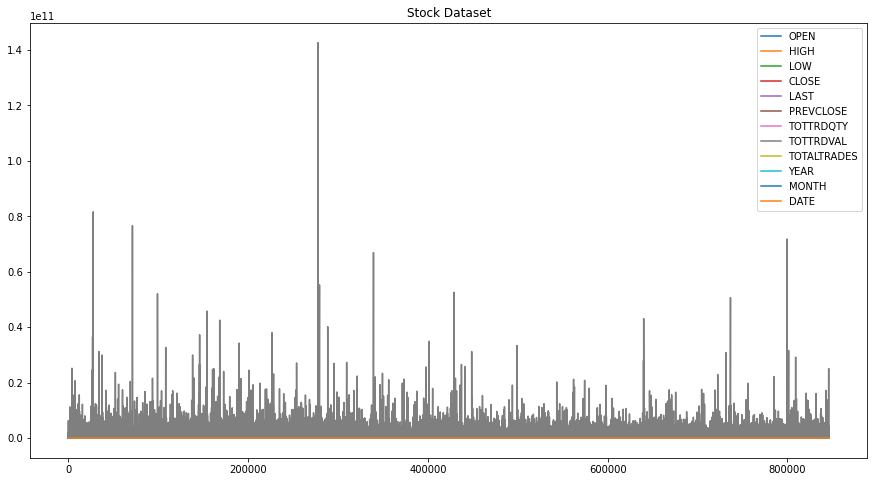

In [ ]:
#visalization of data using line plot

import matplotlib.pyplot as plt
# get columns to plot
columns = df.columns
# create x data
x_data = range(0, len(df))
y_data = df['CLOSE']
# create figure and axis
fig, ax = plt.subplots(figsize=(15.,8.))
# plot each column
for column in columns:
    ax.plot(x_data, df[column], label=column)
# set title and legend
ax.set_title('Stock Dataset')
ax.legend()

In [ ]:
X = df.drop('CLOSE', axis=1)
Y = df['CLOSE']

In [ ]:
print('x =',X.head())
print('\ny =',Y.head())

x =        OPEN      HIGH       LOW      LAST  ...  TOTALTRADES  YEAR  MONTH  DATE
0     37.80     37.80     36.15     37.40  ...          202  2017      6    28
1      4.10      4.85      4.00      4.65  ...         7353  2017      6    28
2  13425.15  13469.55  12920.00  13300.00  ...          748  2017      6    28
3     61.00     61.90     60.35     61.10  ...          437  2017      6    28
4    546.10    548.00    535.00    535.20  ...         1866  2017      6    28

[5 rows x 11 columns]

y = 0       36.85
1        4.55
2    13266.70
3       61.00
4      537.45
Name: CLOSE, dtype: float64


In [ ]:
#Normalizing data using min-max normalization

normalized_df=(X-X.min())/(X.max()-X.min())

In [ ]:
#mounting google drive
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
normalized_df.head()

,OPEN,HIGH,LOW,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES,YEAR,MONTH,DATE
0,0.000315,0.000315,0.000301,0.000312,0.000308,0.000035,0.000007,0.000168,1.0,0.454545,0.9
1,0.000034,0.000040,0.000033,0.000039,0.000033,0.025782,0.000646,0.006163,1.0,0.454545,0.9
2,0.111885,0.112255,0.107675,0.110843,0.112180,0.000003,0.000212,0.000626,1.0,0.454545,0.9
3,0.000508,0.000515,0.000503,0.000509,0.000505,0.000035,0.000012,0.000365,1.0,0.454545,0.9
4,0.004551,0.004567,0.004458,0.004460,0.004562,0.000102,0.000303,0.001563,1.0,0.454545,0.9


In [ ]:
#PCA calculation
#Load dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
import seaborn

X_std = StandardScaler().fit_transform(X)

In [ ]:
#Covariance” indicates the direction of the linear relationship between variables.
#“Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables. 
#Correlation is a function of the covariance.
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00000118e+00  9.99888164e-01  9.99906703e-01  9.99743955e-01
   9.99165298e-01 -3.18362066e-02  6.02346392e-02  2.21014042e-02
   2.73070489e-02  1.60158408e-02  6.63192113e-04]
 [ 9.99888164e-01  1.00000118e+00  9.99819335e-01  9.99830881e-01
   9.99112191e-01 -3.17537313e-02  6.09119284e-02  2.27654361e-02
   2.71809532e-02  1.60769189e-02  6.71109101e-04]
 [ 9.99906703e-01  9.99819335e-01  1.00000118e+00  9.99809380e-01
   9.99082112e-01 -3.18612717e-02  5.98635678e-02  2.16776007e-02
   2.75607764e-02  1.60098894e-02  6.89207290e-04]
 [ 9.99743955e-01  9.99830881e-01  9.99809380e-01  1.00000118e+00
   9.98969750e-01 -3.17435395e-02  6.04512204e-02  2.24285659e-02
   2.73468870e-02  1.60586260e-02  7.12022075e-04]
 [ 9.99165298e-01  9.99112191e-01  9.99082112e-01  9.98969750e-01
   1.00000118e+00 -3.18736960e-02  6.00442895e-02  2.20856880e-02
   2.72731293e-02  1.60707525e-02  5.86383386e-04]
 [-3.18362066e-02 -3.17537313e-02 -3.18612717e-02 -3.17435395e-02


In [ ]:
#Perform eigendecomposition on covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-4.46782830e-01  1.33522099e-02 -1.31318508e-02 -2.06386312e-03
   3.45185520e-03  6.34702421e-03  4.96650099e-03  1.65586477e-01
   6.71774493e-01 -5.55489125e-01  1.12628729e-01]
 [-4.46785052e-01  1.29583390e-02 -1.25459446e-02 -2.01576337e-03
   3.43353835e-03  6.50523681e-03  4.94482121e-03  2.07156856e-01
  -4.54510375e-01  2.25657343e-02  7.41601187e-01]
 [-4.46771624e-01  1.35768262e-02 -1.35034318e-02 -2.07087649e-03
   3.44174798e-03  6.07033682e-03  4.67906216e-03  2.27060611e-01
  -5.03254638e-01 -3.08974561e-01 -6.32191850e-01]
 [-4.46754406e-01  1.31758433e-02 -1.29704295e-02 -2.01126553e-03
   3.45242245e-03  6.31267032e-03  5.51718584e-03  2.90677778e-01
   2.97879880e-01  7.68114284e-01 -1.91720797e-01]
 [-4.46569479e-01  1.34041872e-02 -1.31475434e-02 -2.06818611e-03
   3.35104940e-03  6.37333833e-03  5.74958760e-03 -8.90851644e-01
  -1.18994089e-02  7.38738752e-02 -3.03049338e-02]
 [ 1.13006382e-02 -4.76462747e-01 -8.78514451e-01 -9.78718881e-03
   5.

In [ ]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
#The eigenvectors with the lowest eigenvalues describe the least amount of variation within the dataset
# eigen_pairs=[]
# for i in range(len(eig_vals)):
#   eigen_pairs.append((np.abs(eig_vals[i]), eig_vecs[:,i]))

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(reverse = True)
print('Eigenvalues:')
for i in eig_pairs:
    print(i[0])

Eigenvalues:
5.006095233612186
2.2080318957041225
1.026091258647287
0.9977909254950521
0.9731448550406291
0.6450270825909659
0.14195931983865182
0.0013781921854214166
0.00026794029565981335
0.00017587865020775228
5.04141130727932e-05


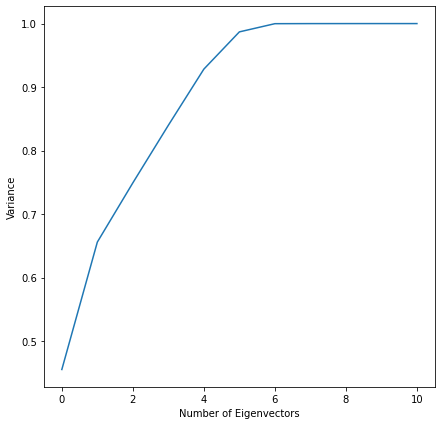

In [ ]:
#Explained variance
pca = sklearnPCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Eigenvectors')
plt.ylabel('Variance')
from pylab import rcParams
rcParams['figure.figsize'] = 7,7
plt.show()

In [ ]:
Y.head()
print(Y.shape)

(846404,)


In [ ]:
y = np.array(Y).reshape(-1, 1)
print(y.shape)

(846404, 1)


In [ ]:
from sklearn.model_selection import train_test_split

def get_data(pdf_no):
  X_train, X_test, y_train, y_test = train_test_split(pdf_no, y, test_size=0.3, random_state=0)
  y_train = np.array(y_train)

  y_train = np.array(y_train)
  y_test = np.array(y_test)
  X_train = np.array(X_train)
  X_test = np.array(X_test)
  X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1]))
  X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1]))
  return X_train, X_test, y_train, y_test

#print('xtrain={}, ytrain={}, xtest={}, ytest={}'.format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))

In [ ]:
pdf = [1,2,3,4,5,6,7,8,9,10,11]
accuracy=[]

Using 1 component of PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(X_std)
pdf1 = pd.DataFrame(data = principalComponents, columns = ['pca1'])
pdf1.head()

,pca1
0,-0.581320
1,-0.659691
2,14.219191
3,-0.554499
4,-0.013932


In [ ]:
from sklearn import linear_model
from math import sqrt

X_train,X_test,y_train,y_test=get_data(pdf1)

rr = linear_model.Ridge() 
rr.fit(X_train, y_train)
pr=rr.predict(X_test) 
acc=0
for i in range(len(pr)):
  if(sqrt((y_test[i]-pr[i])**2)<15):
    acc+=1
print('Accuracy = ',(acc/(len(y_test)))*100)
accuracy.append(acc/(len(y_test)))

Accuracy =  48.400296153937035


Using 2 component of PCA

In [ ]:
#2 components: checking performance
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)
pdf2 = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2'])
pdf2.head()

,pca1,pca2
0,-0.581320,-0.348051
1,-0.659691,2.406933
2,14.219191,-0.739695
3,-0.554499,-0.338243
4,-0.013932,-0.247531


In [ ]:
#fitting the regressin model using 2 component data
#from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=get_data(pdf2)

rr = linear_model.Ridge(alpha=0.1) # higher the alpha value, more restriction in the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
pr=rr.predict(X_test) 
acc=0
loss=[]
for i in range(len(pr)):
  if(sqrt((y_test[i]-pr[i])**2)<15):
    acc+=1
    loss.append(y_test[i]-pr[i])
print('Accuracy = ',(acc/(len(y_test)))*100)
accuracy.append(acc/(len(y_test)))

Accuracy =  54.13552193193185


Using 3 component of PCA

In [ ]:
#3 components: checking performance
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_std)
pdf3 = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2', 'pca3'])
pdf3.head()

,pca1,pca2,pca3
0,-0.581320,-0.348051,-0.748212
1,-0.659691,2.406933,-0.693062
2,14.219191,-0.739695,-0.679700
3,-0.554499,-0.338243,-0.747897
4,-0.013932,-0.247531,-0.743671


In [ ]:
#fitting the regressin model using 3 component data
#from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=get_data(pdf3)

rr = linear_model.Ridge(alpha=0.1) # higher the alpha value, more restriction in the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
pr=rr.predict(X_test) 
acc=0
loss=[]
for i in range(len(pr)):
  if(sqrt((y_test[i]-pr[i])**2)<15):
    acc+=1
    loss.append(y_test[i]-pr[i])
print('Accuracy = ',(acc/(len(y_test)))*100)
accuracy.append(acc/(len(y_test)))

Accuracy =  54.938130607036804


Using 4 component of PCA

In [ ]:
#4 components: checking performance
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X_std)
pdf4 = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2', 'pca3', 'pca4'])
pdf4.head()

,pca1,pca2,pca3,pca4
0,-0.581320,-0.348051,-0.748212,-1.200504
1,-0.659691,2.406933,-0.693062,-1.161818
2,14.219191,-0.739695,-0.679700,-0.988972
3,-0.554499,-0.338243,-0.747897,-1.199607
4,-0.013932,-0.247531,-0.743671,-1.187578


In [ ]:
#fitting the regressin model using 4 component data
#from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=get_data(pdf4)

rr = linear_model.Ridge(alpha=0.1) # higher the alpha value, more restriction in the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
pr=rr.predict(X_test) 
acc=0
loss=[]
for i in range(len(pr)):
  if(sqrt((y_test[i]-pr[i])**2)<15):
    acc+=1
    loss.append(y_test[i]-pr[i])
print('Accuracy = ',(acc/(len(y_test)))*100)
accuracy.append(acc/(len(y_test)))

Accuracy =  86.76286418663999


Using 5 components of PCA

In [ ]:
#5 components: checking performance
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_std)
pdf5 = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5'])
pdf5.head()

,pca1,pca2,pca3,pca4,pca5
0,-0.581320,-0.348051,-0.748212,-1.200504,0.969347
1,-0.659691,2.406933,-0.693062,-1.161818,0.999166
2,14.219191,-0.739695,-0.679700,-0.988972,1.083161
3,-0.554499,-0.338243,-0.747897,-1.199607,0.969608
4,-0.013932,-0.247531,-0.743671,-1.187578,0.974453


In [ ]:
#fitting the regressin model using 5 component data
#from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=get_data(pdf5)

rr = linear_model.Ridge(alpha=0.1) # higher the alpha value, more restriction in the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
pr=rr.predict(X_test) 
acc=0
loss=[]
for i in range(len(pr)):
  if(sqrt((y_test[i]-pr[i])**2)<15):
    acc+=1
    loss.append(y_test[i]-pr[i])
print('Accuracy = ',(acc/(len(y_test)))*100)
accuracy.append(acc/(len(y_test)))

Accuracy =  90.34309748662976


Using 6 components of PCA

In [ ]:
#6 components: checking performance
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(X_std)
pdf6 = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6'])
pdf6.head()

,pca1,pca2,pca3,pca4,pca5,pca6
0,-0.581320,-0.348051,-0.748212,-1.200504,0.969347,-0.001646
1,-0.659691,2.406933,-0.693062,-1.161818,0.999166,4.155136
2,14.219191,-0.739695,-0.679700,-0.988972,1.083161,0.397339
3,-0.554499,-0.338243,-0.747897,-1.199607,0.969608,-0.006097
4,-0.013932,-0.247531,-0.743671,-1.187578,0.974453,-0.032901


In [ ]:
#fitting the regressin model using the 6 component data
#from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=get_data(pdf6)

rr = linear_model.Ridge(alpha=0.1) # higher the alpha value, more restriction in the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
pr=rr.predict(X_test) 
acc=0
loss=[]
for i in range(len(pr)):
  if(sqrt((y_test[i]-pr[i])**2)<15):
    acc+=1
    loss.append(y_test[i]-pr[i])
print('Accuracy = ',(acc/(len(y_test)))*100)
accuracy.append(acc/(len(y_test)))

Accuracy =  94.36401729665015


Using 7 components of PCA

In [ ]:
#6 components: checking performance
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(X_std)
pdf7 = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7'])
pdf7.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7
0,-0.581320,-0.348051,-0.748212,-1.200504,0.969347,-0.001646,0.072133
1,-0.659691,2.406933,-0.693062,-1.161818,0.999166,4.155136,-0.018139
2,14.219191,-0.739695,-0.679700,-0.988972,1.083161,0.397339,-0.093075
3,-0.554499,-0.338243,-0.747897,-1.199607,0.969608,-0.006097,0.061341
4,-0.013932,-0.247531,-0.743671,-1.187578,0.974453,-0.032901,0.033146


In [ ]:
#fitting the regressin model using the 7 component data
#from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=get_data(pdf7)

rr = linear_model.Ridge(alpha=0.1) # higher the alpha value, more restriction in the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
pr=rr.predict(X_test) 
acc=0
loss=[]
for i in range(len(pr)):
  if(sqrt((y_test[i]-pr[i])**2)<15):
    acc+=1
    loss.append(y_test[i]-pr[i])
print('Accuracy = ',(acc/(len(y_test)))*100)
accuracy.append(acc/(len(y_test)))

Accuracy =  95.19970699663676


Using 8 components of PCA

In [ ]:
#6 components: checking performance
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(X_std)
pdf8 = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8'])
pdf8.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8
0,-0.581320,-0.348051,-0.748212,-1.200504,0.969347,-0.001646,0.072133,0.000258
1,-0.659691,2.406933,-0.693062,-1.161818,0.999166,4.155136,-0.018139,0.000492
2,14.219191,-0.739695,-0.679700,-0.988972,1.083161,0.397339,-0.093075,-0.101287
3,-0.554499,-0.338243,-0.747897,-1.199607,0.969608,-0.006097,0.061341,0.000339
4,-0.013932,-0.247531,-0.743671,-1.187578,0.974453,-0.032901,0.033146,-0.003629


In [ ]:
#fitting the regressin model using the 8 component data
#from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=get_data(pdf8)

rr = linear_model.Ridge(alpha=0.1) # higher the alpha value, more restriction in the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
pr=rr.predict(X_test) 
acc=0
loss=[]
for i in range(len(pr)):
  if(sqrt((y_test[i]-pr[i])**2)<15):
    acc+=1
    loss.append(y_test[i]-pr[i])
print('Accuracy = ',(acc/(len(y_test)))*100)
accuracy.append(acc/(len(y_test)))

Accuracy =  96.30634604327312


Using 9 components of PCA

In [ ]:
#6 components: checking performance
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(X_std)
pdf9 = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9'])
pdf9.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9
0,-0.581320,-0.348051,-0.748212,-1.200504,0.969347,-0.001646,0.072133,0.000258,-0.000167
1,-0.659691,2.406933,-0.693062,-1.161818,0.999166,4.155136,-0.018139,0.000492,-0.000781
2,14.219191,-0.739695,-0.679700,-0.988972,1.083161,0.397339,-0.093075,-0.101287,-0.014463
3,-0.554499,-0.338243,-0.747897,-1.199607,0.969608,-0.006097,0.061341,0.000339,-0.000187
4,-0.013932,-0.247531,-0.743671,-1.187578,0.974453,-0.032901,0.033146,-0.003629,0.003031


In [ ]:
#fitting the regressin model using the 9 component data
#from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=get_data(pdf9)

rr = linear_model.Ridge(alpha=0.1) # higher the alpha value, more restriction in the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
pr=rr.predict(X_test) 
acc=0
loss=[]
for i in range(len(pr)):
  if(sqrt((y_test[i]-pr[i])**2)<15):
    acc+=1
    loss.append(y_test[i]-pr[i])
print('Accuracy = ',(acc/(len(y_test)))*100)
accuracy.append(acc/(len(y_test)))

Accuracy =  97.59020486606124


Using 10 components of PCA

In [ ]:
#6 components: checking performance
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X_std)
pdf10 = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10'])
pdf10.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,-0.581320,-0.348051,-0.748212,-1.200504,0.969347,-0.001646,0.072133,0.000258,-0.000167,-0.000153
1,-0.659691,2.406933,-0.693062,-1.161818,0.999166,4.155136,-0.018139,0.000492,-0.000781,0.001319
2,14.219191,-0.739695,-0.679700,-0.988972,1.083161,0.397339,-0.093075,-0.101287,-0.014463,0.086478
3,-0.554499,-0.338243,-0.747897,-1.199607,0.969608,-0.006097,0.061341,0.000339,-0.000187,-0.000380
4,-0.013932,-0.247531,-0.743671,-1.187578,0.974453,-0.032901,0.033146,-0.003629,0.003031,0.000595


In [ ]:
#fitting the regressin model using the 10 component data
#from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=get_data(pdf10)


rr = linear_model.Ridge(alpha=0.1) # higher the alpha value, more restriction in the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
pr=rr.predict(X_test) 
acc=0
loss=[]
for i in range(len(pr)):
  if(sqrt((y_test[i]-pr[i])**2)<15):
    acc+=1
    loss.append(y_test[i]-pr[i])
print('Accuracy = ',(acc/(len(y_test)))*100)
accuracy.append(acc/(len(y_test)))

Accuracy =  97.5846913619143


Using 11 components of PCA


In [ ]:
#6 components: checking performance
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(X_std)
pdf11 = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11'])
pdf11.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11
0,-0.581320,-0.348051,-0.748212,-1.200504,0.969347,-0.001646,0.072133,0.000258,-0.000167,-0.000153,0.000541
1,-0.659691,2.406933,-0.693062,-1.161818,0.999166,4.155136,-0.018139,0.000492,-0.000781,0.001319,0.000003
2,14.219191,-0.739695,-0.679700,-0.988972,1.083161,0.397339,-0.093075,-0.101287,-0.014463,0.086478,0.095324
3,-0.554499,-0.338243,-0.747897,-1.199607,0.969608,-0.006097,0.061341,0.000339,-0.000187,-0.000380,0.000147
4,-0.013932,-0.247531,-0.743671,-1.187578,0.974453,-0.032901,0.033146,-0.003629,0.003031,0.000595,0.000770


In [ ]:
#fitting the regressin model using the 11 component data
#from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=get_data(pdf11)

rr = linear_model.Ridge(alpha=0.1) # higher the alpha value, more restriction in the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
pr=rr.predict(X_test) 
acc=0
loss=[]
for i in range(len(pr)):
  if(sqrt((y_test[i]-pr[i])**2)<15):
    acc+=1
    loss.append(y_test[i]-pr[i])
print('Accuracy = ',(acc/(len(y_test)))*100)
accuracy.append(acc/(len(y_test)))

Accuracy =  97.54452154598656


(0.0, 100.0)

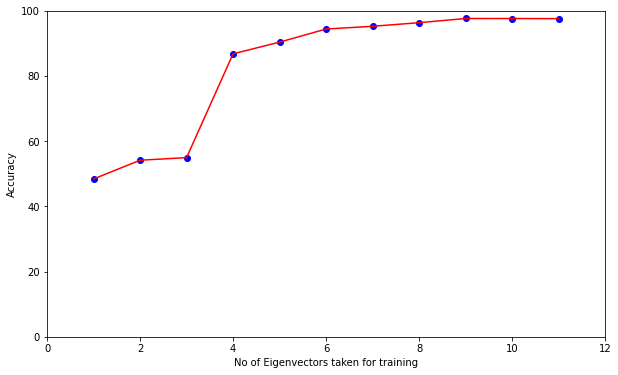

In [ ]:
#plt.scatter(y_test, pr)
from pylab import rcParams
rcParams['figure.figsize'] = 10,6

accu=[i*100 for i in accuracy]
plt.plot(pdf,accu, c='red')
plt.scatter(pdf,accu, c='blue')
plt.xlabel('No of Eigenvectors taken for training')
plt.ylabel('Accuracy')
axes = plt.gca()
axes.set_xlim([0,12])
axes.set_ylim([0,100])


In [ ]:
def PCA():
  #identifying covariance matrix
  cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
  eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

  # eigenvectors and eigenvalues for the from the covariance matrix
  eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

  for i in range(len(eig_val_sc)):
      eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
      eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T

  eig_pairs = [(np.abs(eigvec_sc[i]), eigvec_cov[:,i]) for i in range(len(eigvec_cov))]
  eig_pairs.sort(reverse = True)
  #print the descending sorted eigen values for variance difference determination
  print('Eigenvalues:')
  for i in eig_pairs:
      print(i[0])
      

In [ ]:
def RegressionModel(components):
  #get the test and train set for specified components
  X_train,X_test,y_train,y_test=get_data(components)
  rr = linear_model.Ridge(alpha=0.1) 
  #fit the model
  rr.fit(X_train, y_train)
  #test on test set
  pr=rr.predict(X_test) 
  #calculate and report accuracy
  acc=0
  loss=[]
  for i in range(len(pr)):
    if(sqrt((y_test[i]-pr[i])**2)<15):
      acc+=1
      loss.append(y_test[i]-pr[i])
  print('Accuracy = ',(acc/(len(y_test)))*100)
  accuracy.append(acc/(len(y_test)))